## 0.1 Imports

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## 0.2 Configurando conexão com SQLite 

In [86]:
engine = create_engine("sqlite://///Users/jonatas/Documents/db_paipe/Untitled")

## 0.3 Carregando dados de TREINO e dados de TESTE do BD

In [87]:
# Dados de treino
df_treino = pd.read_sql("SELECT * FROM traindf", con=engine)

# Dados de teste
#df_teste = pd.read_sql("SELECT * FROM test", con=engine)

# 1.0 Overview, Limpeza e Análise Exploratória de Dados

In [88]:
df_treino.head()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
0,Pre-owned Condominiums,etc.,13103,Tokyo,Minato Ward,Kaigan,Takeshiba,1,1.0,1.0,...,,Quasi-industrial Zone,60.0,400.0,1st quarter 2011,2011,1,Done,,24000000
1,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,15.0,...,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3,,Dealings including private road,51000000
2,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,90.0,...,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4,,,14000000
3,Pre-owned Condominiums,etc.,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,16,16.0,16.0,...,,Quasi-industrial Zone,60.0,200.0,2nd quarter 2015,2015,2,Not yet,,23000000
4,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,6.0,...,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4,,,33000000


In [89]:
print("Numero de linhas: {}".format(df_treino.shape[0]))
print("Numero de colunas: {}".format(df_treino.shape[1]))

Numero de linhas: 325260
Numero de colunas: 37


In [90]:
df_treino.duplicated().sum()

2467

In [91]:
df_treino = df_treino.drop_duplicates()

In [92]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322793 entries, 0 to 325259
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Type                         322793 non-null  object
 1   Region                       322793 non-null  object
 2   MunicipalityCode             322793 non-null  int64 
 3   Prefecture                   322793 non-null  object
 4   Municipality                 322793 non-null  object
 5   DistrictName                 322793 non-null  object
 6   NearestStation               322793 non-null  object
 7   TimeToNearestStation         322793 non-null  object
 8   MinTimeToNearestStation      322793 non-null  object
 9   MaxTimeToNearestStation      322793 non-null  object
 10  FloorPlan                    322793 non-null  object
 11  Area                         322793 non-null  int64 
 12  AreaIsGreaterFlag            322793 non-null  int64 
 13  UnitPrice          

In [93]:
df_treino.describe() # para var numericas

,MunicipalityCode,Area,AreaIsGreaterFlag,TotalFloorAreaIsGreaterFlag,PrewarBuilding,Year,Quarter,TradePrice
count,322793.000000,322793.000000,322793.000000,322793.000000,322793.000000,322793.000000,322793.000000,3.227930e+05
mean,13139.923948,117.783827,0.003600,0.003036,0.000762,2012.600335,2.499528,6.644556e+07
std,46.162175,204.903810,0.059891,0.055016,0.027596,3.900543,1.118705,3.257466e+08
min,13101.000000,10.000000,0.000000,0.000000,0.000000,2005.000000,1.000000,1.000000e+03
25%,13110.000000,50.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,2.200000e+07
50%,13117.000000,70.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,3.500000e+07
75%,13201.000000,115.000000,0.000000,0.000000,0.000000,2016.000000,3.000000,5.400000e+07
max,13421.000000,5000.000000,1.000000,1.000000,1.000000,2019.000000,4.000000,6.100000e+10


### Convertendo as variáveis para os tipos indicados

In [94]:
# dicionário de mapeamento de tipos de dados
tipo_variaveis = {
    "Type": "str",
    "Region": "str",
    "MunicipalityCode": "int",
    "Prefecture": "str",
    "Municipality": "str",
    "DistrictName": "str",
    "NearestStation": "str",
    "TimeToNearestStation": "str",
    "MinTimeToNearestStation": "int",
    "MaxTimeToNearestStation": "int",
    "FloorPlan": "str",
    "Area": "int",
    "AreaIsGreaterFlag": "int",
    "UnitPrice": "float",
    "PricePerTsubo": "float",
    "LandShape": "str",
    "Frontage": "float",
    "FrontageIsGreaterFlag": "bool",
    "TotalFloorArea": "int",
    "TotalFloorAreaIsGreaterFlag": "int",
    "BuildingYear": "int",
    "PrewarBuilding": "int",
    "Structure": "str",
    "Use": "str",
    "Purpose": "str",
    "Direction": "str",
    "Classification": "str",
    "Breadth": "float",
    "CityPlanning": "str",
    "CoverageRatio": "float",
    "FloorAreaRatio": "float",
    "Period": "str",
    "Year": "int",
    "Quarter": "int",
    "Renovation": "str",
    "Remarks": "str",
    "TradePrice": "int"
}

# Aplicar conversões
for coluna, tipo in tipo_variaveis.items():
    try:
        if tipo == "int":
            df_treino[coluna] = pd.to_numeric(df_treino[coluna], errors='coerce').astype("Int64")
        elif tipo == "float":
            df_treino[coluna] = pd.to_numeric(df_treino[coluna], errors='coerce')
        elif tipo == "bool":
            df_treino[coluna] = df_treino[coluna].map({1: True, 0: False, 'True': True, 'False': False}).astype("boolean")
        else:
            df_treino[coluna] = df_treino[coluna].astype("string")
    except KeyError:
        print(f"Coluna '{coluna}' não encontrada no DataFrame")

print(df_treino.dtypes)


Type                           string[python]
Region                         string[python]
MunicipalityCode                        Int64
Prefecture                     string[python]
Municipality                   string[python]
DistrictName                   string[python]
NearestStation                 string[python]
TimeToNearestStation           string[python]
MinTimeToNearestStation                 Int64
MaxTimeToNearestStation                 Int64
FloorPlan                      string[python]
Area                                    Int64
AreaIsGreaterFlag                       Int64
UnitPrice                             float64
PricePerTsubo                         float64
LandShape                      string[python]
Frontage                              float64
FrontageIsGreaterFlag                 boolean
TotalFloorArea                          Int64
TotalFloorAreaIsGreaterFlag             Int64
BuildingYear                            Int64
PrewarBuilding                    

### Verificando missing values 

In [95]:
df_treino.isna().sum()

Type                                0
Region                              0
MunicipalityCode                    0
Prefecture                          0
Municipality                        0
DistrictName                        0
NearestStation                      0
TimeToNearestStation                0
MinTimeToNearestStation          8040
MaxTimeToNearestStation          8163
FloorPlan                           0
Area                                0
AreaIsGreaterFlag                   0
UnitPrice                      259264
PricePerTsubo                  259264
LandShape                           0
Frontage                       160776
FrontageIsGreaterFlag          322793
TotalFloorArea                 213868
TotalFloorAreaIsGreaterFlag         0
BuildingYear                    73682
PrewarBuilding                      0
Structure                           0
Use                                 0
Purpose                             0
Direction                           0
Classificati

## Análise Univariada

### Type                                          

In [96]:
# 5 tipo de imóveis diferentes 
df_treino['Type'].value_counts()

Type
Pre-owned Condominiums                 145311
Residential Land(Land and Building)    113540
Residential Land(Land Only)             63529
Forest Land                               337
Agricultural Land                          76
Name: count, dtype: Int64

### Region                              

In [97]:
# existem observaçoes sem classificação aqui. 
# Vou somar estas areas em etc. e nomear para Mixed Areab
df_treino['Region'].value_counts()

Region
Residential Area              157077
 etc.                         145311
Commercial Area                18497
Industrial Area                 1092
                                 413
Potential Residential Area       403
Name: count, dtype: Int64

In [99]:
# substituir valores vazios ("") por "Mixed Area"
df_treino['Mixed Area'] = df_treino['Region'].replace("", "Mixed Area", inplace=True)
df_treino['Region'].value_counts()

Region
Residential Area              157077
 etc.                         145311
Commercial Area                18497
Industrial Area                 1092
Mixed Area                       413
Potential Residential Area       403
Name: count, dtype: Int64

### MunicipalityCode

In [100]:
df_treino['MunicipalityCode'].nunique()

59

### Prefecture

In [102]:
# todas as observações são tokyo, portanto podemos tirar essa coluna do dataset
df_treino['Prefecture']

0         Tokyo
1         Tokyo
2         Tokyo
3         Tokyo
4         Tokyo
          ...  
325254    Tokyo
325255    Tokyo
325256    Tokyo
325258    Tokyo
325259    Tokyo
Name: Prefecture, Length: 322793, dtype: string

In [107]:
# Dropar a coluna 'Prefecture'
#df_treino.drop(columns=['Prefecture'], inplace=True)

# Verificar para garantir que a coluna foi removida
#df_treino.head()


### Municipality

In [112]:
# 59 municípios para 59 código únicos! 
df_treino['Municipality'].nunique()

59

### DistrictName

In [115]:
# Existem 1446 distritos únicos no dataset
df_treino['DistrictName'].nunique()

1446

### NearestStation - nome da estação mais próxima dos imóveis

In [117]:
df_treino['NearestStation'].nunique()
df_treino['NearestStation'].value_counts()

NearestStation
Hachioji           3026
Shinkoiwa          2675
Oizumigakuen       2638
Kanamachi          2077
Mitaka             1959
                   ... 
Sakuragaoka           1
Musashikosugi         1
Tachikawakita         1
Urayasu (Chiba)       1
Yurakucho             1
Name: count, Length: 657, dtype: Int64

### TimeToNearestStation

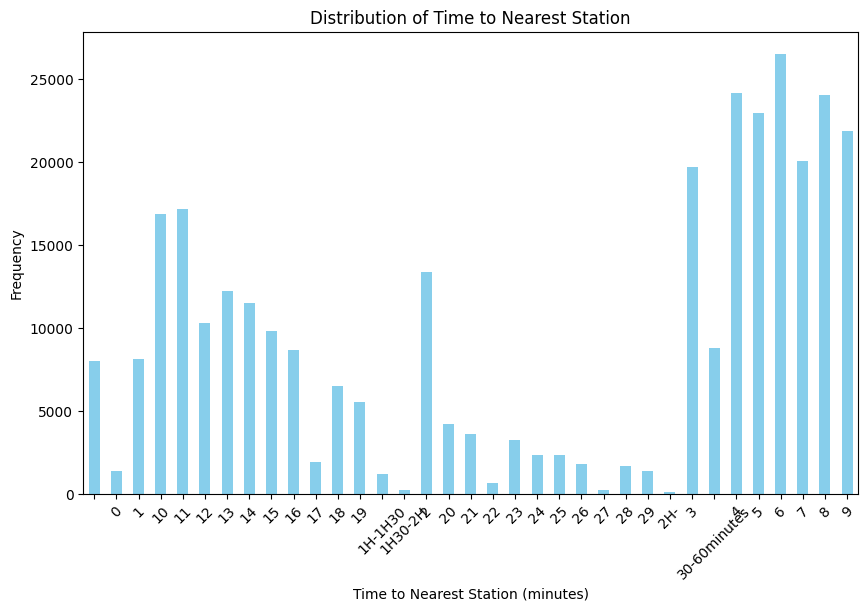

In [118]:
# o tempo mais comum é entre 4 e 9 minutos
time_counts = df_treino['TimeToNearestStation'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
time_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Time to Nearest Station (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Nearest Station')
plt.xticks(rotation=45)
plt.show()


### MinTimeToNearestStation & MaxTimeToNearestStation


In [119]:
# para substituir os missing values, vou usar uma média entre o menor MinTimeToNearestStation 
# e o maior MaxTimeToNearestStation para cada município.
municipality_means = df_treino.groupby('Municipality').apply(
    lambda x: (x['MinTimeToNearestStation'].min() + x['MaxTimeToNearestStation'].max()) / 2)

# substitui  os valores nulos usando a média por município
df_treino['MinTimeToNearestStation'] = df_treino.apply(
    lambda row: municipality_means[row['Municipality']] if pd.isnull(row['MinTimeToNearestStation']) else row['MinTimeToNearestStation'],
    axis=1)

df_treino['MaxTimeToNearestStation'] = df_treino.apply(
    lambda row: municipality_means[row['Municipality']] if pd.isnull(row['MaxTimeToNearestStation']) else row['MaxTimeToNearestStation'],
    axis=1)


### FloorPlan

### Area

### AreaIsGreaterFlag

### UnitPrice

### PricePerTsubo

### LandShape

### Frontage

### FrontageIsGreaterFlag

### TotalFloorArea

TotalFloorAreaIsGreaterFlag         0


BuildingYear                    73682


PrewarBuilding                      0


Structure                           0


Use 

In [12]:
# 325260 total observations

# Frontageisgreaterflag

df_treino['FrontageIsGreaterFlag'] = df_treino['Frontage'].apply(lambda x: 1 if x >= 50 else 0)

In [13]:
df_treino.isna().sum()

Type                                0
Region                              0
MunicipalityCode                    0
Prefecture                          0
Municipality                        0
DistrictName                        0
NearestStation                      0
TimeToNearestStation                0
MinTimeToNearestStation          8040
MaxTimeToNearestStation          8163
FloorPlan                           0
Area                                0
AreaIsGreaterFlag                   0
UnitPrice                      259264
PricePerTsubo                  259264
LandShape                           0
Frontage                       160776
FrontageIsGreaterFlag               0
TotalFloorArea                 213868
TotalFloorAreaIsGreaterFlag         0
BuildingYear                    73682
PrewarBuilding                      0
Structure                           0
Use                                 0
Purpose                             0
Direction                           0
Classificati

In [14]:
df_treino.head()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
0,Pre-owned Condominiums,etc.,13103,Tokyo,Minato Ward,Kaigan,Takeshiba,1,1,1,...,NaN,Quasi-industrial Zone,60.0,400.0,1st quarter 2011,2011,1,Done,,24000000
1,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15,15,...,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3,,Dealings including private road,51000000
2,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60,90,...,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4,,,14000000
3,Pre-owned Condominiums,etc.,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,16,16,16,...,NaN,Quasi-industrial Zone,60.0,200.0,2nd quarter 2015,2015,2,Not yet,,23000000
4,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6,6,...,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4,,,33000000


In [15]:
# Beadth




### Breadth - Largura da via em frente (m)

In [16]:
# Calcula a média e a mediana de 'breadth' por 'Municipality'
print(f"A média do Breadth é {df_treino['Breadth'].mean()}")
print(f"A mediana do Breadth é {df_treino['Breadth'].median()}")

media_mediana_por_municipio = df_treino.groupby('Municipality')['Breadth'].agg(['mean', 'median'])

# Exibe o resultado
print(media_mediana_por_municipio)


A média do Breadth é 6.24812805614681
A mediana do Breadth é 5.0
                                        mean  median
Municipality                                        
Adachi Ward                         6.650403    5.50
Akiruno City                        5.902284    5.00
Akishima City                       6.136192    5.00
Arakawa Ward                        6.008068    4.00
Bunkyo Ward                         6.687080    4.00
Chiyoda Ward                       12.635233    8.00
Chofu City                          5.459796    4.50
Chuo Ward                          12.218202   10.00
Edogawa Ward                        6.767071    5.40
Fuchu City                          6.003664    5.00
Fussa City                          6.996883    6.00
Hachijo Town                        5.671282    5.00
Hachioji City                       6.470117    6.00
Hamura City                         6.928620    6.00
Higashikurume City                  5.679418    5.00
Higashimurayama City              

In [17]:
# Substitui os valores nulos na coluna 'breadth' pela média do município correspondente
df_treino['Breadth'] = df_treino.groupby('Municipality')['Breadth'].transform(lambda x: x.fillna(x.mean()))


In [18]:
print(df_treino['Breadth'].mean())
# ou
print(df_treino['Breadth'].median())


6.580032855892617
6.0


### Coverage Ratio - Percentual máximo de cobertura do edifício (%)

In [19]:
# Calcula a média e a mediana de 'CoverageRatio' por 'Municipality'
media_mediana_coverageratio = df_treino.groupby('Municipality')['CoverageRatio'].agg(['mean', 'median'])

print(f"A média do CoverageRatio é {df_treino['CoverageRatio'].mean()}")
print(f"A mediana do CoverageRatio é {df_treino['CoverageRatio'].median()}")

# Exibe o resultado
print(media_mediana_coverageratio)

A média do CoverageRatio é 62.08568016092532
A mediana do CoverageRatio é 60.0
                                        mean  median
Municipality                                        
Adachi Ward                        62.807703    60.0
Akiruno City                       46.088398    40.0
Akishima City                      53.682540    60.0
Arakawa Ward                       74.541042    80.0
Bunkyo Ward                        71.269354    80.0
Chiyoda Ward                       77.963462    80.0
Chofu City                         52.747551    50.0
Chuo Ward                          77.357143    80.0
Edogawa Ward                       62.256559    60.0
Fuchu City                         55.684231    60.0
Fussa City                         57.417085    60.0
Hachijo Town                       69.347826    70.0
Hachioji City                      52.547259    50.0
Hamura City                        55.110497    60.0
Higashikurume City                 48.831993    40.0
Higashimurayama City

In [20]:
df_treino['CoverageRatio'] = df_treino.groupby('Municipality')['CoverageRatio'].transform(lambda x: x.fillna(x.mean()))

### Floor Area Ratio

In [21]:
# Calcula a média e a mediana de 'FloorAreaRatio' por 'Municipality'
media_mediana_FloorAreaRatio = df_treino.groupby('Municipality')['FloorAreaRatio'].agg(['mean', 'median'])

print(f"A média do FloorAreaRatio é {df_treino['FloorAreaRatio'].mean()}")
print(f"A mediana do FloorAreaRatio é {df_treino['FloorAreaRatio'].median()}")

# Exibe o resultado
print(media_mediana_FloorAreaRatio)

A média do FloorAreaRatio é 264.73563615790795
A mediana do FloorAreaRatio é 200.0
                                         mean  median
Municipality                                         
Adachi Ward                        256.147889   200.0
Akiruno City                       102.889503    80.0
Akishima City                      160.181406   200.0
Arakawa Ward                       371.755645   300.0
Bunkyo Ward                        415.416444   400.0
Chiyoda Ward                       576.609763   600.0
Chofu City                         157.435897   100.0
Chuo Ward                          551.481481   500.0
Edogawa Ward                       249.044726   200.0
Fuchu City                         185.107122   200.0
Fussa City                         186.964824   200.0
Hachijo Town                       200.543478   200.0
Hachioji City                      167.610703   150.0
Hamura City                        168.462247   200.0
Higashikurume City                 129.885738    80.0

In [22]:
df_treino['FloorAreaRatio'] = df_treino.groupby('Municipality')['FloorAreaRatio'].transform(lambda x: x.fillna(x.mean()))

### UnitPrice - preço por Unidade de Área (Yen/m2)

In [23]:
# Calcula a média e a mediana de 'FloorAreaRatio' por 'Municipality'
media_mediana_UnitPrice = df_treino.groupby('Municipality')['UnitPrice'].agg(['mean', 'median'])

print(f"A média do UnitPrice é {df_treino['UnitPrice'].mean()}")
print(f"A mediana do UnitPrice é {df_treino['UnitPrice'].median()}")

# Exibe o resultado
print(media_mediana_UnitPrice)

A média do UnitPrice é 425948.76028270554
A mediana do UnitPrice é 340000.0
                                           mean     median
Municipality                                              
Adachi Ward                        2.625393e+05   240000.0
Akiruno City                       8.953131e+04    90000.0
Akishima City                      1.829932e+05   180000.0
Arakawa Ward                       4.033056e+05   370000.0
Bunkyo Ward                        7.924288e+05   760000.0
Chiyoda Ward                       2.019204e+06  1600000.0
Chofu City                         3.370790e+05   320000.0
Chuo Ward                          2.034217e+06  1300000.0
Edogawa Ward                       3.107808e+05   300000.0
Fuchu City                         2.839057e+05   270000.0
Fussa City                         1.608542e+05   160000.0
Hachijo Town                       6.024014e+03     4450.0
Hachioji City                      1.325487e+05   120000.0
Hamura City                        1.53

In [24]:
df_treino['UnitPrice'] = df_treino.groupby('Municipality')['UnitPrice'].transform(lambda x: x.fillna(x.mean()))

### Price per Tsubo

In [25]:
# Calcula a média e a mediana de 'FloorAreaRatio' por 'Municipality'
media_mediana_PriceperTsubo = df_treino.groupby('Municipality')['PricePerTsubo'].agg(['mean', 'median'])

print(f"A média do PricePerTsubo é {df_treino['PricePerTsubo'].mean()}")
print(f"A mediana do PricePerTsubo é {df_treino['PricePerTsubo'].median()}")

# Exibe o resultado
print(media_mediana_PriceperTsubo)

A média do PricePerTsubo é 1407764.9616080844
A mediana do PricePerTsubo é 1100000.0
                                           mean     median
Municipality                                              
Adachi Ward                        8.676866e+05   800000.0
Akiruno City                       2.959576e+05   300000.0
Akishima City                      6.043810e+05   590000.0
Arakawa Ward                       1.331287e+06  1200000.0
Bunkyo Ward                        2.618034e+06  2500000.0
Chiyoda Ward                       6.681157e+06  5400000.0
Chofu City                         1.113547e+06  1000000.0
Chuo Ward                          6.710271e+06  4200000.0
Edogawa Ward                       1.026814e+06  1000000.0
Fuchu City                         9.392361e+05   900000.0
Fussa City                         5.327188e+05   535000.0
Hachijo Town                       1.992630e+04    14500.0
Hachioji City                      4.384522e+05   400000.0
Hamura City                   

In [26]:
df_treino['PricePerTsubo'] = df_treino.groupby('Municipality')['PricePerTsubo'].transform(lambda x: x.fillna(x.mean()))

In [27]:
df_treino.isna().sum()

Type                                0
Region                              0
MunicipalityCode                    0
Prefecture                          0
Municipality                        0
DistrictName                        0
NearestStation                      0
TimeToNearestStation                0
MinTimeToNearestStation          8040
MaxTimeToNearestStation          8163
FloorPlan                           0
Area                                0
AreaIsGreaterFlag                   0
UnitPrice                           0
PricePerTsubo                       0
LandShape                           0
Frontage                       160776
FrontageIsGreaterFlag               0
TotalFloorArea                 213868
TotalFloorAreaIsGreaterFlag         0
BuildingYear                    73682
PrewarBuilding                      0
Structure                           0
Use                                 0
Purpose                             0
Direction                           0
Classificati

### MinTimeToNearestStation & MinTimeToNearestStation

### Frontage - Área da fachada em m2

In [29]:
print(f"A média do Frontage é {df_treino['Frontage'].mean()}")
print(f"A mediana do Frontage é {df_treino['Frontage'].median()}")
print(f"O tamanho mínimo do Frontage é {df_treino['Frontage'].min()}")
print(f"O tamanho máximo do Frontage é {df_treino['Frontage'].max()}")

A média do Frontage é 9.630813433158245
A mediana do Frontage é 8.0
O tamanho mínimo do Frontage é 0.5
O tamanho máximo do Frontage é 50.0


In [30]:
# Preenchendo valores nulos com a mediana geral
df_treino['Frontage'].fillna(df_treino['Frontage'].median(), inplace=True)


### TotalFloorArea - Area total do piso em m2

In [31]:
print(f"A média do TotalFloorArea é {df_treino['TotalFloorArea'].mean()}")
print(f"A mediana do TotalFloorArea é {df_treino['TotalFloorArea'].median()}")
print(f"O tamanho mínimo do TotalFloorArea é {df_treino['TotalFloorArea'].min()}")
print(f"O tamanho máximo do TotalFloorArea é {df_treino['TotalFloorArea'].max()}")


A média do TotalFloorArea é 172.84728023869636
A mediana do TotalFloorArea é 95.0
O tamanho mínimo do TotalFloorArea é 10
O tamanho máximo do TotalFloorArea é 2000


In [32]:
median_total_floor_area = df_treino['TotalFloorArea'].median()
df_treino['TotalFloorArea'].fillna(median_total_floor_area, inplace=True)

In [33]:
df_treino.isna().sum()

Type                               0
Region                             0
MunicipalityCode                   0
Prefecture                         0
Municipality                       0
DistrictName                       0
NearestStation                     0
TimeToNearestStation               0
MinTimeToNearestStation          628
MaxTimeToNearestStation          628
FloorPlan                          0
Area                               0
AreaIsGreaterFlag                  0
UnitPrice                          0
PricePerTsubo                      0
LandShape                          0
Frontage                           0
FrontageIsGreaterFlag              0
TotalFloorArea                     0
TotalFloorAreaIsGreaterFlag        0
BuildingYear                   73682
PrewarBuilding                     0
Structure                          0
Use                                0
Purpose                            0
Direction                          0
Classification                     0
B

### Buliding Year - Ano de construção do edifício

In [34]:
print(f"A média do BuildingYear é {df_treino['BuildingYear'].mean()}")
print(f"A mediana do BuildingYear é {df_treino['BuildingYear'].median()}")
print(f"O tamanho mínimo do BuildingYear é {df_treino['BuildingYear'].min()}")
print(f"O tamanho máximo do BuildingYear é {df_treino['BuildingYear'].max()}")

A média do BuildingYear é 1997.839461123756
A mediana do BuildingYear é 2001.0
O tamanho mínimo do BuildingYear é 1945
O tamanho máximo do BuildingYear é 2020


In [35]:
correlation_matrix = df_treino[['BuildingYear', 'TradePrice']].corr()

# Exibindo a matriz de correlação
print(correlation_matrix)

              BuildingYear  TradePrice
BuildingYear      1.000000   -0.020633
TradePrice       -0.020633    1.000000


In [36]:
# substituir os valores nulos em anos em que houveram mais construções em cada município 

df_treino['BuildingYear'] = df_treino.groupby('Municipality')['BuildingYear'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


In [37]:
# mesmo após substituir algiuns NaN's, sobrou alguns valores faltantes, uma vez que necessitavam
# de outros valores que também estavam ausentes. E como a quantidade de pouca em função do volume 
# de dados vou dropar estes também

df_treino.dropna(subset=['MinTimeToNearestStation', 'MaxTimeToNearestStation', 'CoverageRatio', 'FloorAreaRatio'], inplace=True)


## Análise Exploratória de Dados

In [38]:
df2 = df_treino.copy() 

In [39]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])

ValueError: num must be an integer with 1 <= num <= 12, not 13

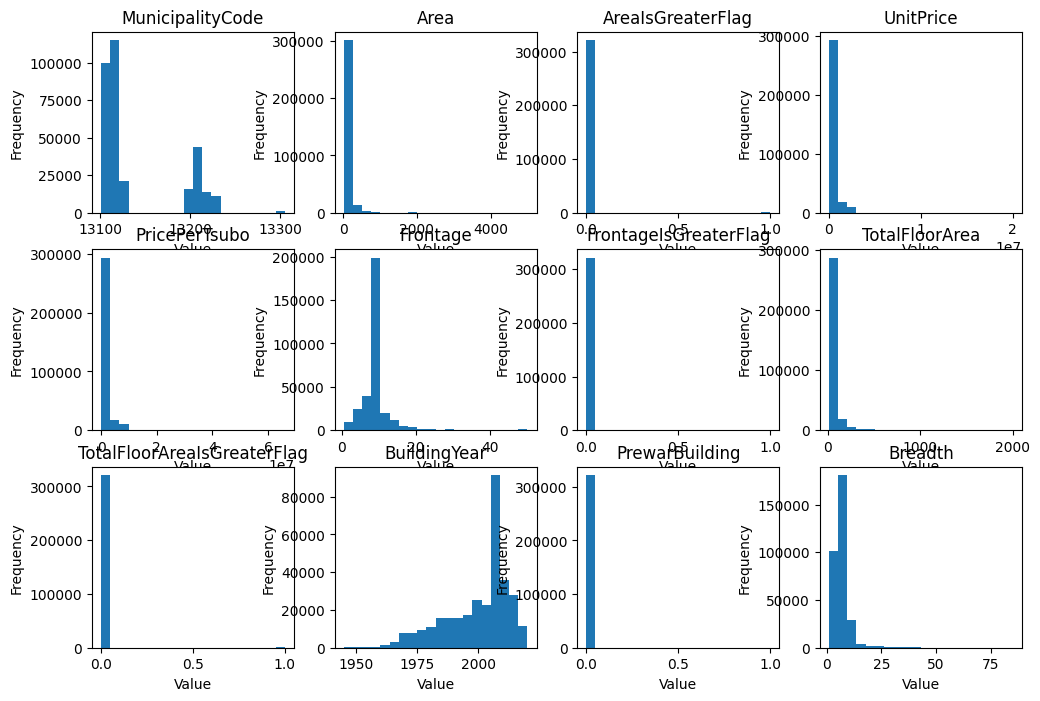

In [40]:
plt.figure(figsize=(12,8))

for i, column in enumerate(num_attributes, 1):
    plt.subplot(3,4,i)
    plt.hist(df2[column], bins=20)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [ ]:
plt.figure(figsize=(20,30))

for i, column in enumerate(cat_attributes, 1):
    plt.subplot(6,3,i)
    sns.countplot(data=df2, x=column)
    plt.title(column, fontweight='bold')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Análise Bivariada

In [ ]:
plt.figure(figsize=(15,20))
for i, column in enumerate (num_attributes, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df2, x = 'TradePrice', y = column)
    plt.title(f'{column} vs TradePrice', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
df2.columns

## Hipóteses

OJECTIVE OF THIS ANALYSIS:
1. To determine if home size and locaton influences the price of homes in Brazil
2. The Top 3 most expensive and cheapest real estate market state in Brazil
3. The most expensive and cheapest real estate market region in Brazil
4. The Region with highest and Lowest number of Home sales
5. The State with highest and lowest number of Home sales
6. Exploring relationship between Home size and price